ЛАБОРАТОРНАЯ РАБОТА 3 Шелонин Никита Максимович БИВТ-22-СП-5

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
file_path = r'data.csv'
data = pd.read_csv(file_path)
data.head()

,EducationSector,IndividualProject,Age,Gender,City,Influenced,Perseverance,DesireToTakeInitiative,Competitiveness,SelfReliance,StrongNeedToAchieve,SelfConfidence,GoodPhysicalHealth,MentalDisorder,KeyTraits,ReasonsForLack,y
0,Engineering Sciences,No,19,Male,Yes,No,2,2,3,3,2,2,3,Yes,Passion,NaN,1
1,Engineering Sciences,Yes,22,Male,No,Yes,3,3,3,4,4,3,4,Yes,Vision,Just not interested! (Want to work in the corp...,0
2,Engineering Sciences,No,18,Male,Yes,No,3,4,3,3,3,4,4,No,Passion,Not willing to start a venture in India and wa...,0
3,Engineering Sciences,Yes,20,Male,Yes,Yes,3,3,3,3,4,3,3,No,Resilience,Not able to take a Financial Risk,0
4,Engineering Sciences,Yes,19,Male,Yes,Yes,2,3,3,3,4,3,2,Yes,Vision,NaN,1


In [8]:
print(data.isnull().sum())

EducationSector            0
IndividualProject          0
Age                        0
Gender                     0
City                       0
Influenced                 0
Perseverance               0
DesireToTakeInitiative     0
Competitiveness            0
SelfReliance               0
StrongNeedToAchieve        0
SelfConfidence             0
GoodPhysicalHealth         0
MentalDisorder             0
KeyTraits                  0
ReasonsForLack            91
y                          0
dtype: int64


In [9]:
data.drop(columns=['ReasonsForLack'], inplace=True)

train test

In [10]:
data = pd.get_dummies(data, drop_first=True)

In [11]:
from sklearn.model_selection import train_test_split

X = data.drop('y', axis=1)
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


Нормировка

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

 Обучение модели

Линейная регрессия

In [13]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression()

Деревянная модель

In [14]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(random_state=0)
tree_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=0)

Метод K-ближайших соседей

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=2)

knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=2)

Метод Случайный лес

In [16]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(n_estimators=100, random_state=0)
forest_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=0)

ДОБАВИЛ ГРАФИКИ Для задачи классификации -- Accuracy, ROC-AUC (график + значение)

Logistic Regression:
  Train Accuracy: 0.70, Train ROC-AUC: 0.79
  Test Accuracy: 0.59, Test ROC-AUC: 0.63

Decision Tree:
  Train Accuracy: 1.00, Train ROC-AUC: 1.00
  Test Accuracy: 0.61, Test ROC-AUC: 0.60

K-Nearest Neighbors:
  Train Accuracy: 0.77, Train ROC-AUC: 0.88
  Test Accuracy: 0.62, Test ROC-AUC: 0.61

Random Forest:
  Train Accuracy: 1.00, Train ROC-AUC: 1.00
  Test Accuracy: 0.56, Test ROC-AUC: 0.57



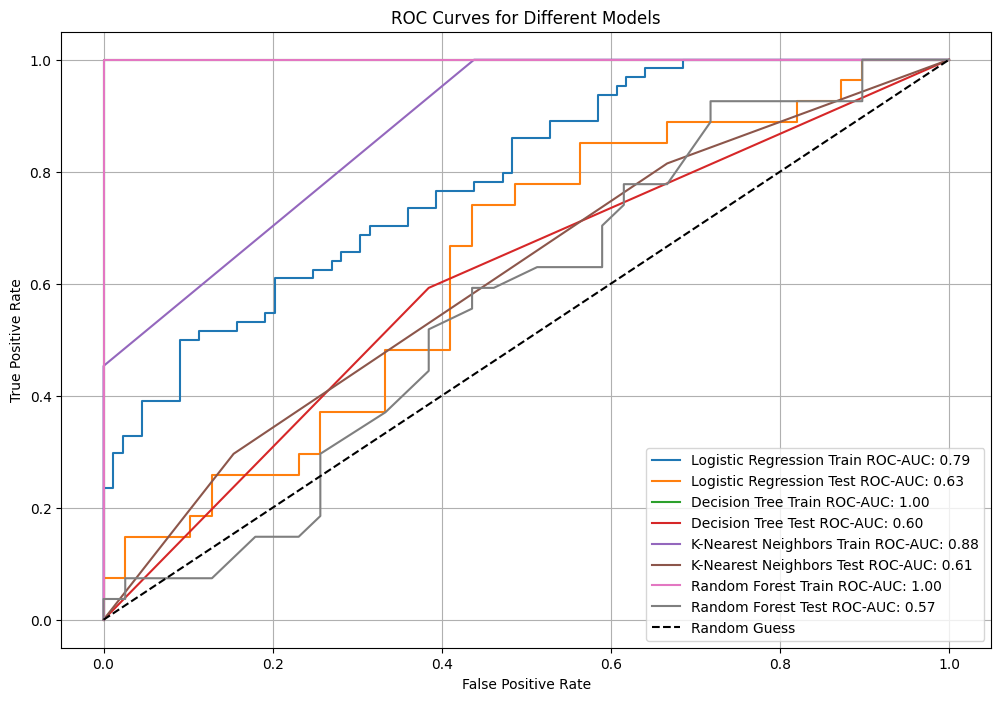

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# Расчёт метрик для всех моделей
models = {
    "Logistic Regression": logistic_model,
    "Decision Tree": tree_model,
    "K-Nearest Neighbors": knn_model,
    "Random Forest": forest_model
}

plt.figure(figsize=(12, 8))

for name, model in models.items():
    # Предсказания
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    y_train_proba = model.predict_proba(X_train_scaled)[:, 1]
    y_test_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # ROC-AUC
    train_auc = roc_auc_score(y_train, y_train_proba)
    test_auc = roc_auc_score(y_test, y_test_proba)

    # ROC-кривые
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)

    # Печать метрик
    print(f"{name}:")
    print(f"  Train Accuracy: {train_accuracy:.2f}, Train ROC-AUC: {train_auc:.2f}")
    print(f"  Test Accuracy: {test_accuracy:.2f}, Test ROC-AUC: {test_auc:.2f}\n")

    # Добавление ROC-кривых на график
    plt.plot(fpr_train, tpr_train, label=f"{name} Train ROC-AUC: {train_auc:.2f}")
    plt.plot(fpr_test, tpr_test, label=f"{name} Test ROC-AUC: {test_auc:.2f}")

# Финализация графика
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Different Models")
plt.legend()
plt.grid()
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

Линейная регрессия

In [ ]:
y_pred_class = logistic_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class, average='weighted')
recall = recall_score(y_test, y_pred_class, average='weighted')
f1 = f1_score(y_test, y_pred_class, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_class))


Accuracy: 0.5909090909090909
Precision: 0.5886363636363636
Recall: 0.5909090909090909
F1 Score: 0.5896389256790499

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.67      0.66        39
           1       0.50      0.48      0.49        27

    accuracy                           0.59        66
   macro avg       0.57      0.57      0.57        66
weighted avg       0.59      0.59      0.59        66



Деревянная модель

In [ ]:
y_pred_class = tree_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class, average='weighted')
recall = recall_score(y_test, y_pred_class, average='weighted')
f1 = f1_score(y_test, y_pred_class, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_class))

Accuracy: 0.6060606060606061
Precision: 0.6163385002094679
Recall: 0.6060606060606061
F1 Score: 0.6089977124459883

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.62      0.65        39
           1       0.52      0.59      0.55        27

    accuracy                           0.61        66
   macro avg       0.60      0.60      0.60        66
weighted avg       0.62      0.61      0.61        66



Метод K-ближайших соседей


In [ ]:
y_pred_class = knn_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class, average='weighted')
recall = recall_score(y_test, y_pred_class, average='weighted')
f1 = f1_score(y_test, y_pred_class, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_class))

Accuracy: 0.6212121212121212
Precision: 0.6087662337662338
Recall: 0.6212121212121212
F1 Score: 0.5882166613873931

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.85      0.73        39
           1       0.57      0.30      0.39        27

    accuracy                           0.62        66
   macro avg       0.60      0.57      0.56        66
weighted avg       0.61      0.62      0.59        66



Метод Случайный лес

In [ ]:
y_pred_class = forest_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class, average='weighted')
recall = recall_score(y_test, y_pred_class, average='weighted')
f1 = f1_score(y_test, y_pred_class, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_class))

Accuracy: 0.5606060606060606
Precision: 0.5388257575757576
Recall: 0.5606060606060606
F1 Score: 0.5393939393939394

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.74      0.67        39
           1       0.44      0.30      0.36        27

    accuracy                           0.56        66
   macro avg       0.52      0.52      0.51        66
weighted avg       0.54      0.56      0.54        66



Какая модель справилась лучше с поставленной задачей? случайный лес показал лучшие результаты, основываясь на наименьшем значении RMSE, что говорит о наилучшем балансе между смещением и дисперсией.